# Support Vector Machines - SVM

SVM é um poderoso e versátil modelo de machine learning, capaz de realizar classificação linear e não linear, regressão e até mesmo detecção de outliers. É um dos modelos mais populares em Machine Learning e também um dos mais recomendados a se ter em sua caixa de ferramentas. SVMs são particularmente adequados para classificação de datasets complexos de tamanho pequeno ou médio. 

A ideia fundamental por trás dos SVMs é melhor explicada com imagens. Para isso, vamos usar o dataset iris já visto em Machine Learning I. Vamos importar os pacotes necessários, fazer o treino do modelo e plotar algumas imagens:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) #selecionamos apenas os dois tipos que temos interesse
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float(1000000000))
svm_clf.fit(X, y)

SVC(C=1000000000.0, kernel='linear')

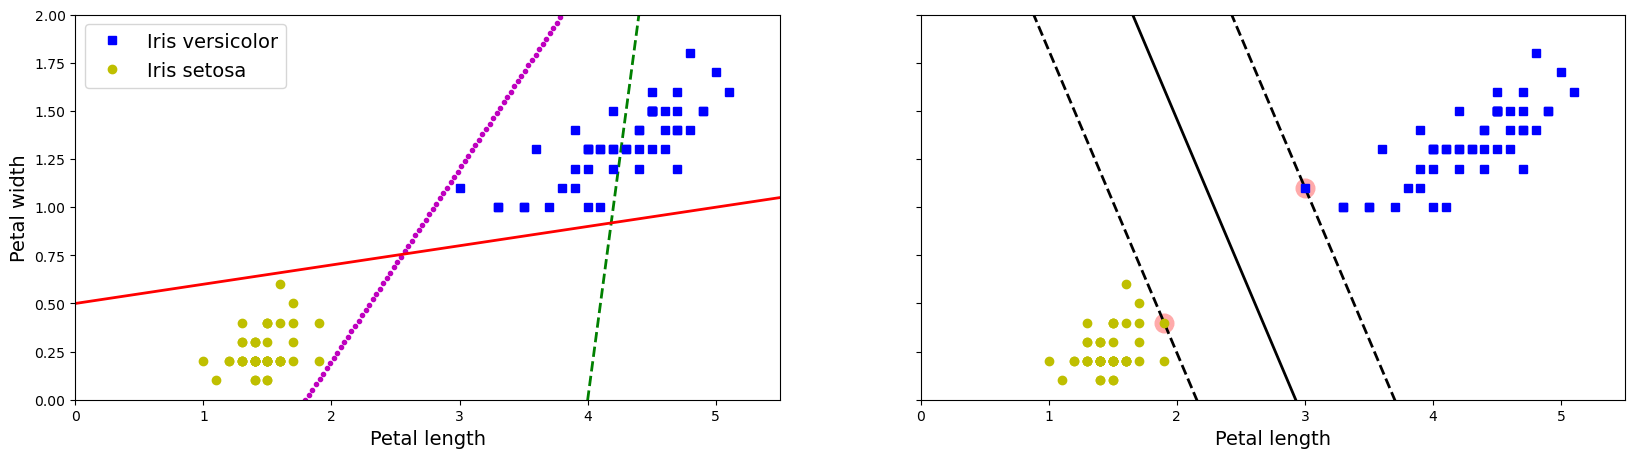

In [3]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # a reta de nossa superfície de decisão tem como equacao w0*x0 + w1*x1 + b = 0, logo
    # x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(20,5), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m.", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

A Figura acima apresenta parte do dataset iris introduzido anteriormente. As duas classes claramente podem ser separadas usando uma linha reta (ou seja, são linearmente separáveis). 

O **plot da esquerda** apresenta as fronteiras de decisão de tres possíveis classificadores lineares. O modelo representado pela linha verde é ruim a ponto de não separar corretamente as classes. Os outros dois modelos funcionam corretamente, mas não conseguiriam generalizar de maneira correta. 

Em contraste, a linha sólida no **plot da direita** representa a fronteira de decisão de um classificador SVM. Esta linha não apenas separa as duas classes como também fica o mais longe possível das amostras de treinamento mais próximas. 

Assim, podemos pensar no SVM como ajustar a maior rua (representada pelas duas linhas pontilhadas) entre as classes. 

**Importante notar que adicionar mais instâncias "fora da rua" não afetará a fronteira de decisão, já que ela é totalmente determinada (ou suportada) pelas instâncias localizadas na margem da rua. Essas instâncias são denominadas *support vectors*.**

## <font color="red">Warning!</font>

SVMs são muito sensíveis à escala, como pode ser visto na imagem abaixo. No **plot da esquerda**, a escala vertical é muito maior que a escala horizontal, então a maior rua possível é próxima da horizontal. Depois de realizar *feature scaling* (**plot da direita**), a fronteira de decisão se torna muito melhor. 

(-2.0, 2.0, -2.0, 2.0)

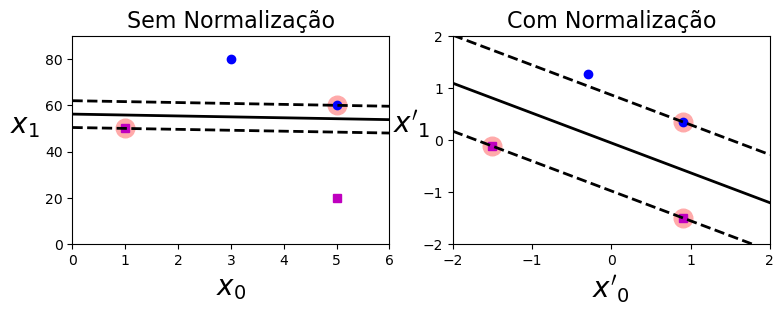

In [4]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Sem Normalização", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Com Normalização", fontsize=16)
plt.axis([-2, 2, -2, 2])

## Soft Margin Classification

Se impormos que todas as amostras precisam estar fora da rua e do lado correto, temos o que chamamos de *hard margin classification*, que apresenta dois problemas principais:

1. Funciona apenas com datasets linearmente separáveis
2. É sensível a outliers

A Figura abaixo mostra o dataset iris adicionando apenas 1 outlier em duas situações distintas: **na esquerda**, é impossível encontrar a margem; **na direita** a fronteira de decisão fica completamente diferente da apresentada acima e provavelmente irá falhar na generalização.

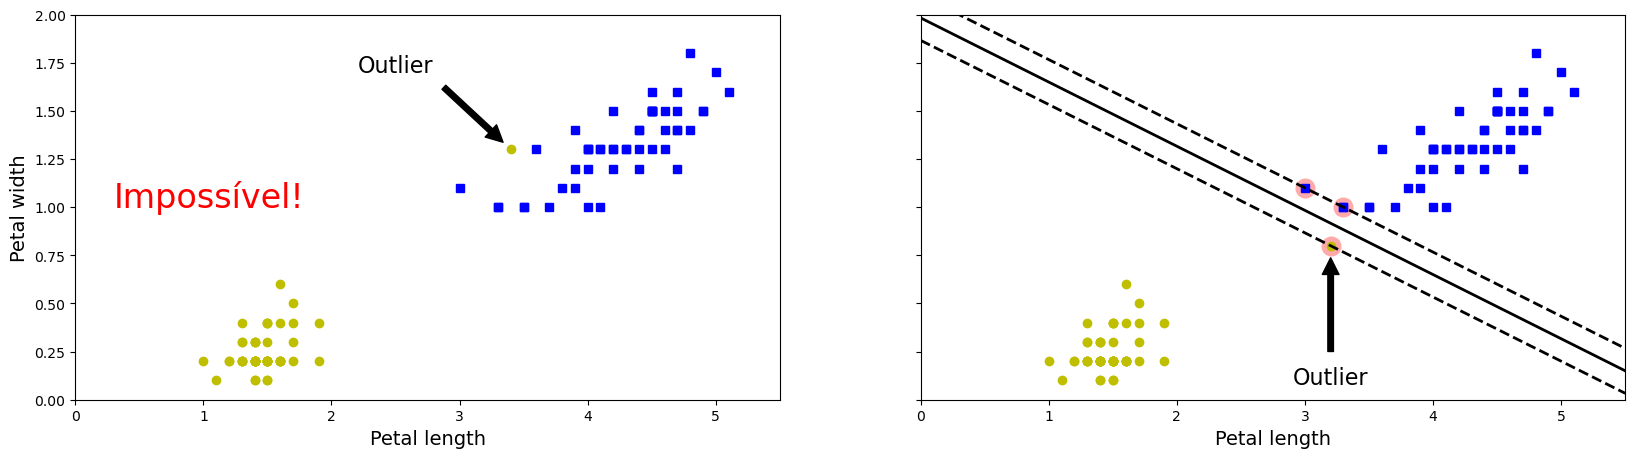

In [5]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(20,5), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossível!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

Para evitar esses problemas, usamos um modelo mais flexível. O objetivo é **encontrar um bom equilíbrio entre manter a rua mais larga o possível e limitar violações da margem**. Isto é chamado *Soft Margin Classification*.

Quando criamos um modelo com a Scikit-Learn, podemos especificar vários hiperparâmetros, entre eles o *C*. Essa parâmtro indica o quão rigoroso eu desejo que o modelo seja em relação a violações à margem, ou seja, a pontos que fiquem do lado oposto à margem encontrada para sua classe. Isto é importante pois em alguns casos pode ser que não seja possível encontrar uma margem que separe todos os pontos, ou, se essa margem existir, ela seja muito pequena, tornando a generalização do modelo para novos exemplos muito ruim. Um outro problema que pode ser causado com um hiperparâmetro muito rigoroso é gerar uma grande sensibilidade a outliers.

In [6]:
svm_clf = SVC(C=0.1, kernel='linear')
svm_clf.fit(X, y)

SVC(C=0.1, kernel='linear')

(0.0, 5.5, 0.0, 2.0)

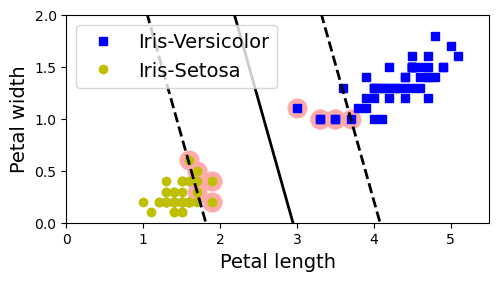

In [7]:
plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.axis([0, 5.5, 0, 2])

# SVM para Classificação Não-Linear

Embora os classificadores SVM lineares sejam eficientes e funcionem bem em muitos casos, muitos datasets não são nem perto de serem linearmente separáveis. Uma abordagem para lidar com dataset não lineares é adicionar mais features, como as features polinomais. Em alguns casos, isso pode resultar em datasets linearmente separáveis. 

Considere o **plot da esquerda** na Figura abaixo. Ele representa um simples dataset com apenas uma feature, $x_1$. Este dataset não é linearmente separável. Mas se adicionarmos uma segunda feature $x_2 = (x_1)^2$ o resultado será um dataset linearmnete separável (**plot da direita**).

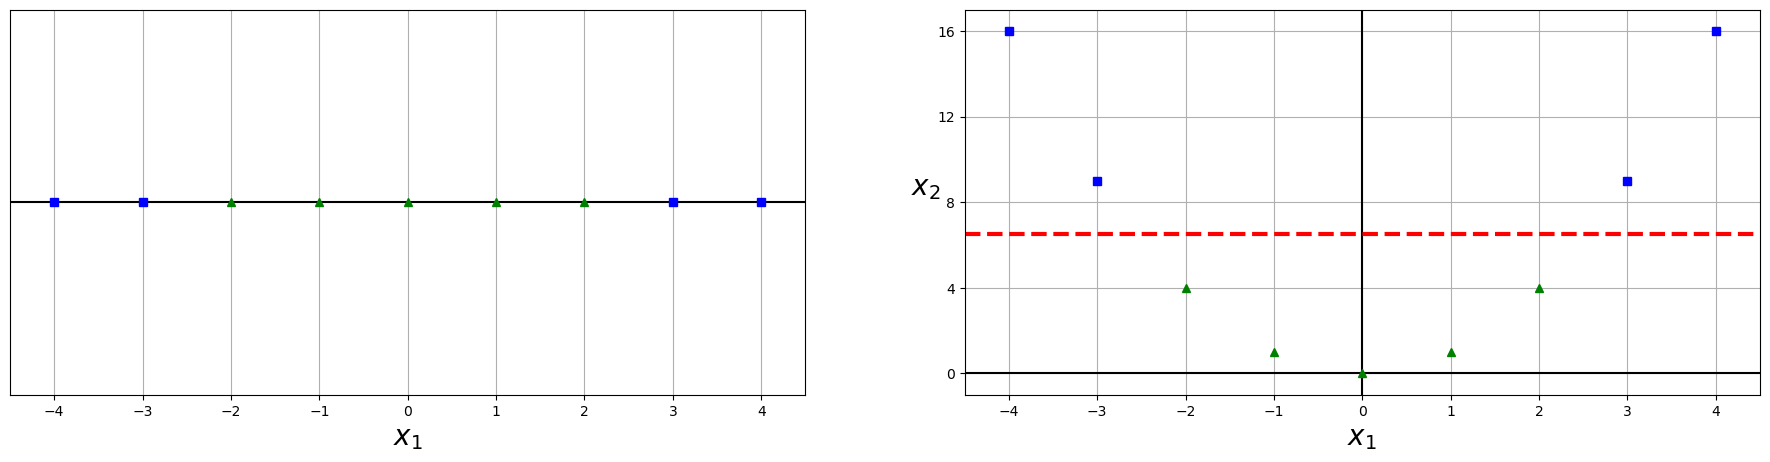

In [8]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

Para implementar essa ideia usando a SKLearn, podemos criar um *Pipeline* contendo três transformers: *PolynomialFeatures*, *StandardScaler* e *LinearSVC*. Veja o exemplo a abaixo, usando o dataset moons. 

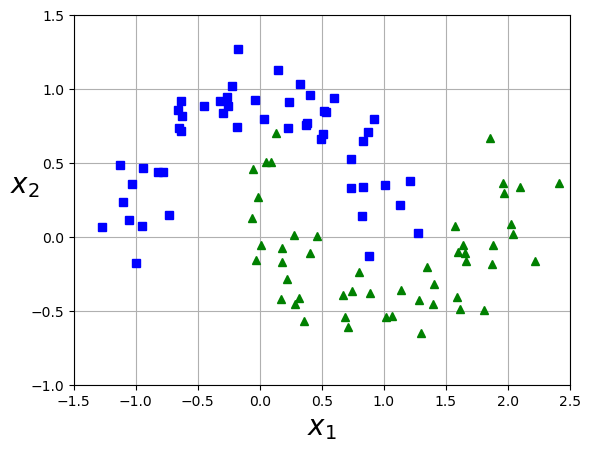

In [9]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [10]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/Users/dhenyfernandes/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

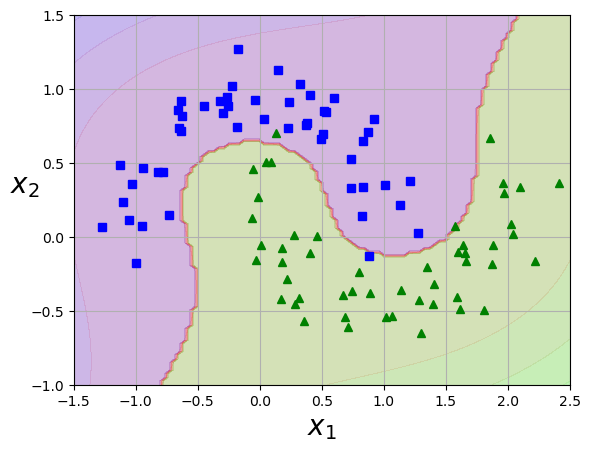

In [11]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Kernel Polinomial

Adicionar features polinomais é simples de implementar e pode funcionar bem com vários algoritmos de machine learning. Dito isto, num baixo grau polinomial, este método não pode lidar com datasets muito complexos, e com um alto grau polinomial um número muito grande de features é criado, tornando o modelo muito lento. 

Felizmente, quando usamos SVM, podemos aplicar a técnica milagrosa chamada *kernel trick*, que possibilita obter o mesmo resultado como se você tivesse adicionado muitas features polinomais, mesmo com polinômios de graus muito altos, sem realmente ter adicionado elas. Assim, não há uma explosão combinatória do número de features pois, de fato, não adicionamos essas features. Vejamos o código para entender:

In [12]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [13]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

O código acima treina um SVM usando um kernel polinomial de grau 3, apresentado no **plot da esquerda**, e um SVM usando um kernel polinomial de grau 10, mostrado no **plot da direita**. O hiperparâmetro *coef0* controla o quanto o modelo é influenciado por polinômios de alto grau versus polinômios de baixo grau.

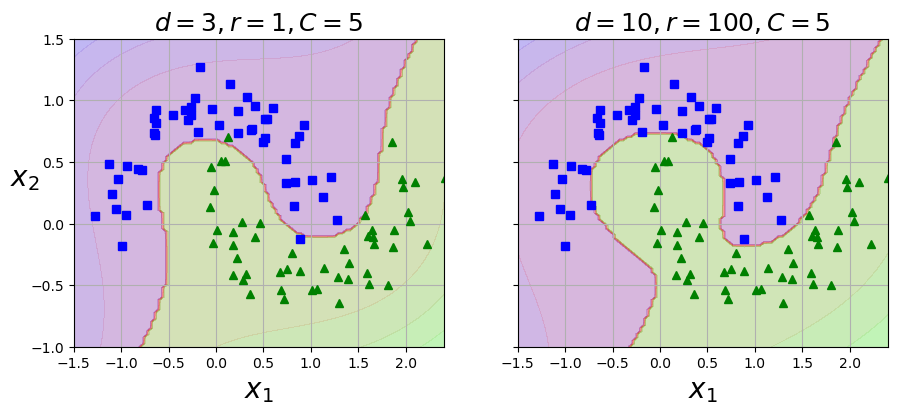

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

# Similarity Features

Outra técnica para lidar com problemas não lineares é adicionar features calculadas usando uma função de similaridade, que mede o quanto cada instância se assemelha a um ponto de referência específico. Vamos retornar ao dataset 1D, visto acima, e adicionar dois pontos de referência a ele, $x_1=-2$ e $x_2=1$.

Agora, vamos definir a função de similaridade *Gaussian Radial Basis Function (RBF)* com $\gamma=0.3$:

$\phi\gamma(x, \ell) = exp(-\gamma\|x-\ell\|^2)$

Esta é uma função em forma de sino que varia de 0 (muito distante do ponto de referência) até 1 (no ponto de referência). Agora estamos prontos para calcular as novas features. Por exemplo, veja a amostra $x_1=-1$: ela está localizada a uma distância 1 do primeiro ponto de referência e uma distância 2 do segundo ponto de referência. 

Dessa maneira, suas novas features serão $x_{1,1} =exp(-0.3\times 1^2) \approx 0.74$ e $x_{1,2} =exp(-0.3\times 2^2) \approx 0.30$. 

Como podemos ver, agora os dados são linearmente separáveis:

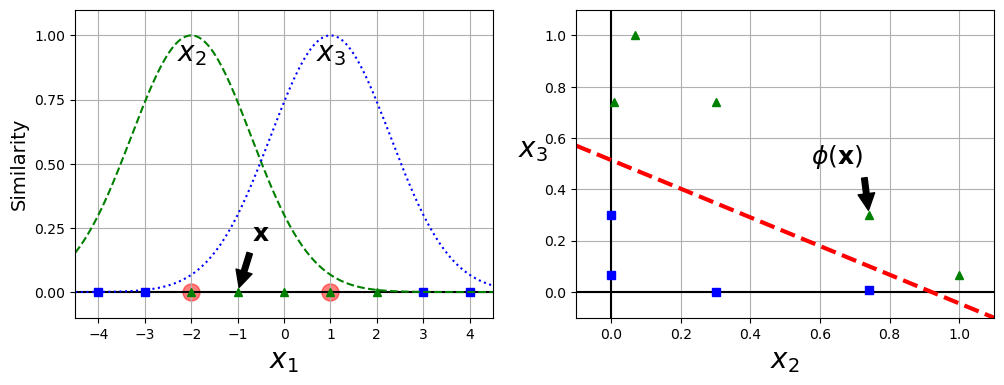

In [15]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
plt.show()

# Kernel RBF

Assim como o método *Polynomial Features*, o método *Similarity Features* pode ser útil com qualquer algoritmo de Machine Learning, mas pode ser computacionalmente caro calcular todos as features adicionais, especialmente em grandes conjuntos de treinamento. Mais uma vez, o kernel trick faz sua mágica SVM, tornando possível obter um resultado semelhante como se você tivesse adicionado muitas features de similaridade. Veja o código abaixo:

In [16]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Este modelo é representado no canto inferior esquerdo da imagem abaixo. Os demais gráficos mostram modelos treinados com diferentes valores dos hiperparâmetros $\gamma$ e $C$ . Aumentar o $\gamma$ torna a curva em forma de sino mais estreita. Como resultado, o alcance de influência de cada instância é menor: o limite de decisão acaba sendo mais curvo em forma de sino: as instâncias têm um alcance de influência maior e a decisão irregular, oscilando em torno de instâncias individuais. Por outro lado, um valor pequeno de $\gamma$ torna o limite mais suave. Então $\gamma$ age como um hiperparâmetro de regularização: se o seu modelo estiver overfitado, você deve reduzi-lo; se estiver underfitado, você deve aumentá-lo (semelhante ao hiperparâmetro $C$).

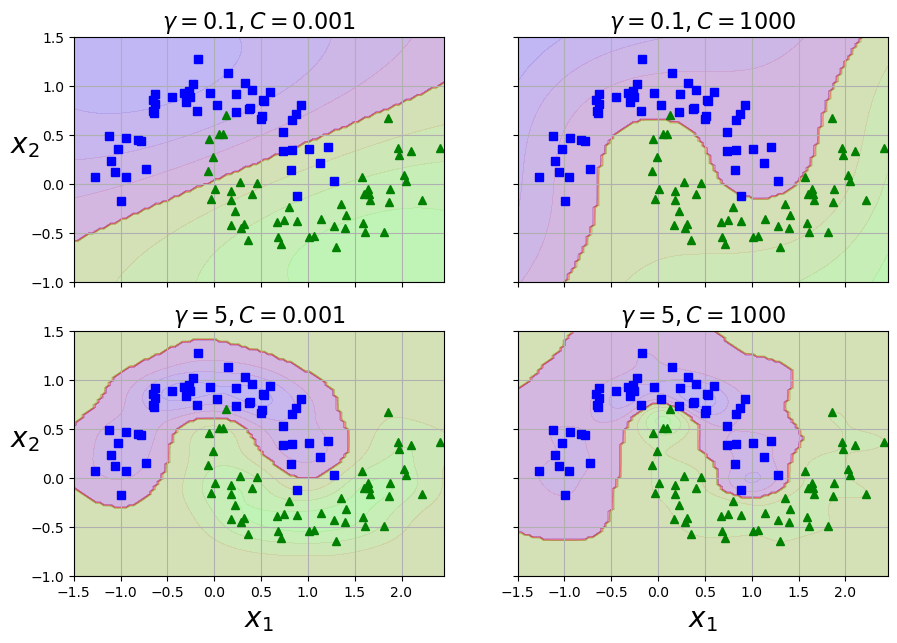

In [17]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()